In [2]:
from rdflib import Graph
import re
import pandas as pd
from rdflib import Graph, URIRef, Namespace, Literal
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/var/folders/6f/k2t20zbs4db5khp6mgdq_06m0000gn/T/ipykernel_69870/2914453593.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [1035]:
#baseline_df = pd.read_csv("/Users/yamamotobikutorueiichi/codes/full-triple-matcher/Full-Triple-Matcher/results/PARIS/ma-dbpedia-original-paris/9_eqv_full.tsv", sep='\t', names=['e1', 'e2', 'sim'])
baseline_df = pd.read_csv('/Users/yamamotobikutorueiichi/codes/custom_paris/both func and func inv method/early_stop/ma-dbpedia-server/llama_added.csv')
#baseline_df = pd.read_csv('/Users/yamamotobikutorueiichi/codes/custom_paris/knowledgegraph-alignments-4/memoryalpha-stexpanded/LogMap/systemAlignment.csv')

In [1036]:
baseline_df

,Unnamed: 0.1,e1,e2,sim,Unnamed: 0,answer,reason
0,0,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Reykjavik,http://dbpedia.org/resource/Reykjavik,0.949768,NaN,NaN,NaN
1,1,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Ship,http://dbpedia.org/resource/Ship,0.950000,NaN,NaN,NaN
2,2,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Richard_Widmark,http://dbpedia.org/resource/Harry_Potter,0.000000,NaN,NaN,NaN
3,3,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/French_language,http://dbpedia.org/resource/French_language,0.950000,NaN,NaN,NaN
4,4,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/1962,http://dbpedia.org/resource/1962,0.950000,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2441,1503,http://www.snopes.com/science/greatwall.asp,http://dbpedia.org/resource/Great_Wall_of_China,0.397275,16059.0,True,Both entities represent the Great Wall of China in real life.
2442,1504,http://www.sparknotes.com/lit/gulliver/,http://dbpedia.org/resource/Gulliver's_Travels,0.354580,16062.0,True,"Both entities represent the same entity in real life, as Gulliver's Travels is a novel by Daniel Defoe and SparkNotes is a website that provides study guides for the book."
2443,1505,http://www.startrek.com/database_article/chosen-realm,http://dbpedia.org/resource/Chosen_Realm,0.169447,16086.0,True,"Both entities represent the same entity in real life, as Chosen Realm is a location in Star Trek"
2444,1506,http://www.tribute.ca/interviews/Alexander+Siddig/star/36924,http://dbpedia.org/resource/Alexander_Siddig,0.212236,16162.0,True,"Both entities represent the same entity in real life, Alexander Siddig is a British actor and the current Doctor Who"


In [1037]:
baseline_df['e2'] = baseline_df['e2'].str.replace(
    'dbp:resource/', 'http://dbpedia.org/resource/')

In [1038]:
baseline_df['e1'] = baseline_df['e1'].str.replace(
    'starwars./', 'starwars.wikia.com/')

In [1039]:
def get_top_n(dictionary, n, reverse=True):
    sorted_elements = sorted(dictionary.items(), key=lambda x: x[1], reverse=reverse)
    if len(sorted_elements) < n:
        return sorted_elements
    n_sim = sorted_elements[n-1][1]
    
    top_n_list = list()
    for element in sorted_elements:
        e2, sim = element
        if (reverse and sim < n_sim) or (not reverse and sim > n_sim):
            return top_n_list
            
        top_n_list.append(element)
    return top_n_list

In [1040]:
grouped_df = baseline_df.groupby('e1')
elem_dict = dict()
for e1, group_indices in tqdm(grouped_df.groups.items()):
    # Access the group corresponding to 'e1'
    e1_group = baseline_df.loc[group_indices]
    e1_dict = dict(zip(e1_group['e2'], e1_group['sim']))
    elem_dict[e1] = e1_dict

  0%|          | 0/2236 [00:00<?, ?it/s]

In [1041]:
hit_at_one_dict = dict()
one_to_one_list = list()
for e1, e1_dict in elem_dict.items():
    top_list = get_top_n(e1_dict, 1)
    for e2, sim in top_list:
        one_to_one_list.append({
            'e1': e1,
            'e2': e2,
            'sim': elem_dict[e1][e2]
        })

In [1042]:
baseline_df = pd.DataFrame(one_to_one_list)

In [1043]:
#match_df = pd.read_csv('/Users/yamamotobikutorueiichi/codes/custom_paris/mal-stx-gold.csv')
match_df = pd.read_csv('/Users/yamamotobikutorueiichi/codes/gollumn - subdataset/ma-dbpedia.csv')

In [1044]:
match_df

,Unnamed: 0,e1,e2
0,0,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Vulcan_nerve_pinch,http://dbpedia.org/resource/Vulcan_nerve_pinch
1,1,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Obsession_(episode),http://dbpedia.org/resource/Obsession_(Star_Trek:_The_Original_Series)
2,2,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Broken_Bow,"http://dbpedia.org/resource/Broken_Bow,_Oklahoma"
3,3,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Boston,http://dbpedia.org/resource/Boston
4,4,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Nemesis_(episode),http://dbpedia.org/resource/Nemesis_(Star_Trek:_Voyager)
...,...,...,...
2173,2173,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Paris,http://dbpedia.org/resource/Paris
2174,2174,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Colm_Meaney,http://dbpedia.org/resource/Colm_Meaney
2175,2175,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/2025,http://dbpedia.org/resource/2025
2176,2176,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Dennis_Madalone,http://dbpedia.org/resource/Dennis_Madalone


In [1045]:
#match_df['e1'] = match_df['e1'].str.replace('starwars.wikia.com', 'starwars.')

In [1046]:
match_df = match_df[match_df['e1'].str.contains('/resource/') & match_df['e2'].str.contains('/resource/')]

In [1047]:
match_df = match_df[['e1', 'e2']]

In [1048]:
match_df

,e1,e2
0,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Vulcan_nerve_pinch,http://dbpedia.org/resource/Vulcan_nerve_pinch
1,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Obsession_(episode),http://dbpedia.org/resource/Obsession_(Star_Trek:_The_Original_Series)
2,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Broken_Bow,"http://dbpedia.org/resource/Broken_Bow,_Oklahoma"
3,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Boston,http://dbpedia.org/resource/Boston
4,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Nemesis_(episode),http://dbpedia.org/resource/Nemesis_(Star_Trek:_Voyager)
...,...,...
2173,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Paris,http://dbpedia.org/resource/Paris
2174,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Colm_Meaney,http://dbpedia.org/resource/Colm_Meaney
2175,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/2025,http://dbpedia.org/resource/2025
2176,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Dennis_Madalone,http://dbpedia.org/resource/Dennis_Madalone


In [1049]:
result_df = pd.merge(baseline_df, match_df, left_on=['e1', 'e2'], right_on=['e1', 'e2'])

In [1050]:
result_df

,e1,e2,sim
0,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/12th_century,http://dbpedia.org/resource/12th_century,0.95
1,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/18th_century,http://dbpedia.org/resource/18th_century,0.95
2,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/1900,http://dbpedia.org/resource/1900,0.95
3,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/1902,http://dbpedia.org/resource/1902,0.95
4,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/1904,http://dbpedia.org/resource/1904,0.95
...,...,...,...
1178,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Zander_Cannon,http://dbpedia.org/resource/Zander_Cannon,0.95
1179,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Zefram_Cochrane,http://dbpedia.org/resource/Zefram_Cochrane,0.95
1180,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Zeus,http://dbpedia.org/resource/Zeus,0.95
1181,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/Zora_Neale_Hurston,http://dbpedia.org/resource/Zora_Neale_Hurston,0.95


In [1051]:
for index, row in tqdm(baseline_df.iterrows(), total=len(baseline_df)):
    e1 = row['e1']
    e2 = row['e2']
    
    if ((result_df['e1'] == e1) & (result_df['e2'] == e2)).any():
        baseline_df.at[index, 'Predicted'] = True
    else:
        baseline_df.at[index, 'Predicted'] = False

  0%|          | 0/2446 [00:00<?, ?it/s]

In [1052]:
baseline_df

,e1,e2,sim,Predicted
0,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/property/director,http://dbpedia.org/resource/Director,0.900000,False
1,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/11001001_(episode),http://dbpedia.org/resource/11001001_(Star_Trek:_The_Next_Generation),0.900000,False
2,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/12th_century,http://dbpedia.org/resource/12th_century,0.950000,True
3,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/18th_century,http://dbpedia.org/resource/18th_century,0.950000,True
4,http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/resource/1900,http://dbpedia.org/resource/1900,0.950000,True
...,...,...,...,...
2441,http://www.snopes.com/science/greatwall.asp,http://dbpedia.org/resource/Great_Wall_of_China,0.397275,False
2442,http://www.sparknotes.com/lit/gulliver/,http://dbpedia.org/resource/Gulliver's_Travels,0.354580,False
2443,http://www.startrek.com/database_article/chosen-realm,http://dbpedia.org/resource/Chosen_Realm,0.169447,False
2444,http://www.tribute.ca/interviews/Alexander+Siddig/star/36924,http://dbpedia.org/resource/Alexander_Siddig,0.212236,False


In [1053]:
for index, row in tqdm(baseline_df.iterrows(), total=len(baseline_df)):
    e1 = row['e1']
    e2 = row['e2']
    
    if ((match_df['e1'] == e1) | (match_df['e2'] == e2)).any():
        baseline_df.at[index, 'Analyzed'] = True
    else:
        baseline_df.at[index, 'Analyzed'] = False

  0%|          | 0/2446 [00:00<?, ?it/s]

In [1054]:
pd.set_option('display.max_colwidth', None)


In [1055]:
analyzed_baseline_df = baseline_df[baseline_df['Analyzed'] == True]

In [1056]:
len(analyzed_baseline_df)

2446

In [1057]:
len(analyzed_baseline_df[analyzed_baseline_df['Predicted'] == True])

1183

In [1058]:
precision = len(analyzed_baseline_df[analyzed_baseline_df['Predicted'] == True]) / len(analyzed_baseline_df)
precision

0.4836467702371218

In [1059]:
recall = len(analyzed_baseline_df[analyzed_baseline_df['Predicted'] == True]) / len(match_df)
recall

0.5431588613406795

In [1060]:
f_measure = 2 * (precision * recall) / (precision + recall)
f_measure

0.5116782006920415

In [1061]:
def precision_score(df, threshold):
    threshold_df = df[df['sim'] > threshold]
    
    matches = len(threshold_df)
    
    if matches == 0:
        return 0
    
    correct_matches_df = pd.merge(threshold_df, match_df, left_on=['e1', 'e2'], right_on=['e1', 'e2'])
    
    correct_matches = len(threshold_df[threshold_df['Predicted'] == True])
    
    return correct_matches / matches 

In [1062]:
def recall_score(df, total_correct, threshold):
    threshold_df = df[df['sim'] > threshold]
    
    correct_matches = len(threshold_df[threshold_df['Predicted'] == True])
    
    return correct_matches / total_correct

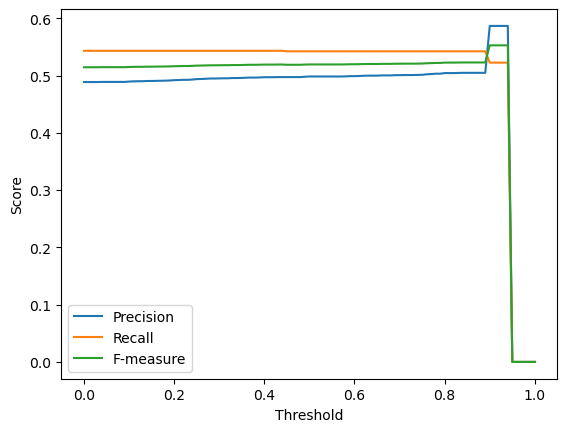

In [1063]:
thresholds = np.arange(0, 1.01, 0.01)

total_correct = len(match_df)

precisions = [precision_score(analyzed_baseline_df, t) for t in thresholds]
recalls = [recall_score(analyzed_baseline_df, total_correct, t) for t in thresholds]
f_measures = []
for precision, recall in zip(precisions, recalls):
    f_measure = 0
    if precision + recall > 0:
        f_measure = 2 * (precision * recall) / (precision + recall)
    f_measures.append(f_measure)
    
# Plot precision, recall, and F-measure
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f_measures, label='F-measure')

# Add labels and legend
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()

# Display the graph
plt.show()

In [1064]:
max_index = f_measures.index(max(f_measures))

# Get the corresponding precision and recall
max_f = f_measures[max_index]
related_precision = precisions[max_index]
related_recall = recalls[max_index]
related_threshold = thresholds[max_index]

print("Related Precision:", related_precision)
print("Related Recall:", related_recall)
print("Max F-measure:", max_f)
print("Related threshold:", related_threshold)

Related Precision: 0.5865979381443299
Related Recall: 0.5224977043158862
Max F-measure: 0.5526954832442934
Related threshold: 0.9
